# 1. Первичные приготавления

## 1.1 Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.2 Загрузка датасета

In [6]:
put_k_buxlu = "S02-hw-dataset.csv"
tablica_s_napitkami = pd.read_csv(put_k_buxlu)
print("Данные успешно загружены. Алкоголь пошёл в оборот.")

Данные успешно загружены. Алкоголь пошёл в оборот.


# 2. Знакомство с датасетом

## 2.1 Первичный осмотр

In [10]:
tablica_s_napitkami.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [12]:
tablica_s_napitkami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [14]:
tablica_s_napitkami.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## 2.2 Наличие пропусков

In [17]:
proplki_po_stakanu = tablica_s_napitkami.isna().mean().sort_values(ascending=False)
proplki_po_stakanu

age          0.04878
user_id      0.00000
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

## 2.3 Наличие дубликатов

In [20]:
skolko_klonov = tablica_s_napitkami.duplicated().sum()
print(tablica_s_napitkami.duplicated())
print(f"Количество полностью дублирующихся строк: {skolko_klonov}")

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool
Количество полностью дублирующихся строк: 1


## 2.4 Поиск подозрительных значений

In [23]:
chisla = tablica_s_napitkami.select_dtypes(include=[np.number])
podzritelnye_znacheniya = {}
for stolbec in chisla.columns:
    plohoe = tablica_s_napitkami[tablica_s_napitkami[stolbec] < 0]
    if len(plohoe) > 0:
        podzritelnye_znacheniya[stolbec] = plohoe
podzritelnye_znacheniya

{'purchases':    user_id    age country  purchases  revenue
 5        6  120.0      FR         -1      785}

## 2.5 Частота категорий

In [26]:
kategoriya = tablica_s_napitkami.select_dtypes(include="object").columns[0]
tablica_s_napitkami[kategoriya].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

## 2.6 Группировка с агрегатами

In [29]:
chislo = tablica_s_napitkami.select_dtypes(include=[np.number]).columns[0]
gruppirovka_po_vkusu = tablica_s_napitkami.groupby(kategoriya)[chislo].mean().sort_values(ascending=False)
gruppirovka_po_vkusu

country
DE    24.666667
US    22.375000
FR    20.666667
RU    18.076923
CN    10.000000
Name: user_id, dtype: float64

# 3. Визуализация сие добра

## 3.1 Всеузнаваемый Histogram

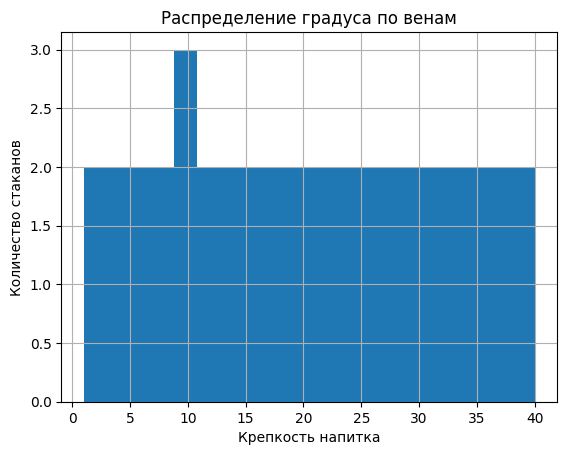

In [33]:
plt.figure()
plt.hist(tablica_s_napitkami[chislo].dropna(), bins=20)
plt.title("Распределение градуса по венам")
plt.xlabel("Крепкость напитка")
plt.ylabel("Количество стаканов")
plt.grid(True)
plt.savefig("histogram_gradus.png")
plt.show()


## 3.2 Некий BoxPlot

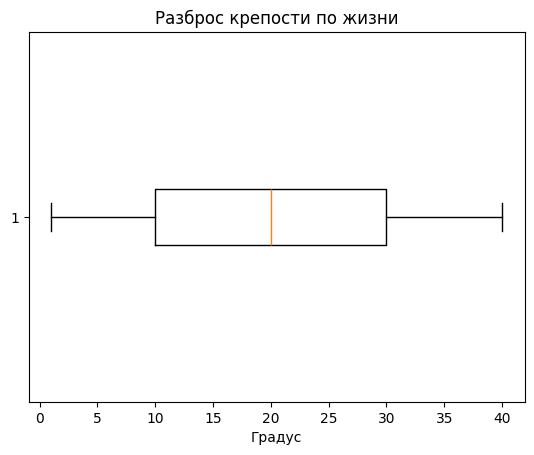

In [36]:
plt.figure()
plt.boxplot(tablica_s_napitkami[chislo].dropna(), vert=False)
plt.title("Разброс крепости по жизни")
plt.xlabel("Градус")
plt.savefig("boxplot_gradus.png")
plt.show()

## 3.3 Уверенный ScatterPlot

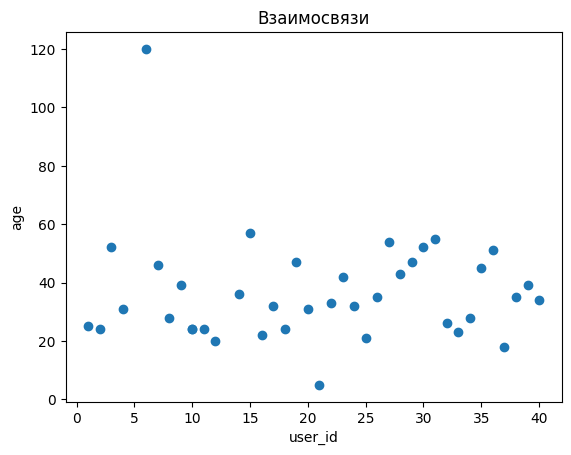

In [39]:
if len(chisla.columns) >= 2:
    osi_x = chisla.columns[0]
    osi_y = chisla.columns[1]

    plt.figure()
    plt.scatter(tablica_s_napitkami[osi_x], tablica_s_napitkami[osi_y])
    plt.xlabel(osi_x)
    plt.ylabel(osi_y)
    plt.title("Взаимосвязи")
    plt.savefig("scatterplot_gradus.png")
    plt.show()